In [4]:
!pip install openpyxl

     |████████████████████████████████| 242 kB 5.0 MB/s            


In [2]:
import pandas as pd
import numpy as np

In [16]:
df=pd.read_excel('avances_marzo.xlsx', usecols='A:H,J,L,P')
df.sample(n=3)

,FECHA,TURNO,EQUIPO,OPERADOR,INGENIERO,GUARDIA,NIVEL,LABOR,SUB ZONA,AVANCE REAL,TIPO DE DISPARO
366,2022-03-16,NOCHE,J-21,"MOLINA PURIS, FRANKLIN JOSE","GAMIO FLORES, AMILCAR JESUS",C,21,XC 400 NE,NV-21,3.30,AVANCE
320,2022-03-13,NOCHE,J-37,"QUICHCA CHANHUALLA, ALBERTO","CUEVA HERNANDEZ, WILMER SEGUNDO",A,19A,GL 370 NE,BAJA,3.20,AVANCE
194,2022-03-04,NOCHE,J-9,"RAMOS PEÑALOZA, EDUARDO","PRIETO TORRES, JEAN CARLOS",B,17,XC 545 NE,BAJA,3.02,AVANCE DEFICIENTE


In [13]:
df.isna().value_counts()

FECHA  TURNO  EQUIPO  OPERADOR  INGENIERO  GUARDIA  NIVEL  LABOR  SUB ZONA  AVANCE REAL  TIPO DE DISPARO
False  False  False   False     False      False    False  False  False     False        False              411
dtype: int64

In [29]:
df['OPERADOR'].apply(lambda x: x.strip().split(' ')[0]).unique()

array(['QUICHCA', 'VENTURA', 'COMUN', 'APOLINARIO', 'CAMPOS', 'YAURI',
       'MOLINA', 'TORRES', 'COLLAZOS', 'LLANCARI', 'QUISPE', 'CUBA',
       'TORDECILLA', 'ARANA', 'GAVE', 'COSME', 'MERINO', 'VARGAS',
       'LAUREANO', 'AQUINO', 'RAMOS', 'LEANDRO'], dtype=object)

In [30]:
df['INGENIERO'].apply(lambda x: x.strip().split(' ')[0]).unique()

array(['CUEVA', 'TACO', 'SANCHEZ', 'HUAMANI', 'SOSA', 'GAMIO', 'LLACSA',
       'CHAMORRO', 'PRIETO', 'VIDAL', 'PEZO', 'QUISPE', 'LOPEZ'],
      dtype=object)

In [33]:
df['OPERADOR']=df['OPERADOR'].apply(lambda x: x.strip().split(' ')[0])
df['INGENIERO']=df['INGENIERO'].apply(lambda x: x.strip().split(' ')[0])

In [45]:
df.sample(3)

,FECHA,TURNO,EQUIPO,OPERADOR,INGENIERO,GUARDIA,NIVEL,LABOR,SUB ZONA,AVANCE REAL,TIPO DE DISPARO
273,2022-03-09,DÍA,J-21,MOLINA,LOPEZ,C,21A,BP 955 SW,NV-21,3.00,AVANCE DEFICIENTE
78,2022-02-25,NOCHE,J-21,MOLINA,PEZO,C,21B,CAM 915 SE,NV-21,3.00,AVANCE DEFICIENTE
267,2022-03-09,DÍA,J-37,APOLINARIO,HUAMANI,C,19A,GL 370 NE,BAJA,3.04,AVANCE DEFICIENTE


In [46]:
df.groupby('INGENIERO')

In [58]:
#filt=((df['INGENIERO']=='TACO') & (df['TIPO DE DISPARO']=='AVANCE'))
filt=((df['INGENIERO']=='TACO') & (df['TIPO DE DISPARO'].isin(['AVANCE','AVANCE DEFICIENTE'])))
#filt=((df['INGENIERO']=='TACO'))
df[filt].describe()

,AVANCE REAL
count,41.000000
mean,3.374390
std,0.197219
min,2.980000
25%,3.200000
50%,3.400000
75%,3.500000
max,3.730000


In [60]:
df.groupby(['INGENIERO', 'TIPO DE DISPARO']).mean()

AVANCE REAL
INGENIERO TIPO DE DISPARO               
CHAMORRO  AVANCE                3.311000
          AVANCE DEFICIENTE     2.890000
          SELLADA               2.230000
CUEVA     AVANCE                3.385000
          AVANCE DEFICIENTE     2.842222
          SELLADA               2.140000
GAMIO     AVANCE                3.225333
          AVANCE 10FT           2.950000
          AVANCE DEFICIENTE     2.655000
          SELLADA               1.350000
HUAMANI   AVANCE                3.376667
          AVANCE 10FT           3.000000
          AVANCE DEFICIENTE     2.656250
          CONEXIÓN              2.920000
LLACSA    AVANCE                3.362778
          AVANCE DEFICIENTE     2.657500
          DQ                    2.500000
          SELLADA               1.800000
LOPEZ     AVANCE DEFICIENTE     3.000000
PEZO      AVANCE                3.290000
          AVANCE DEFICIENTE     2.910000
          SELLADA               1.550000
PRIETO    AVANCE                3.440625
          AVANCE DEFICIENTE     2.906000
          SELLADA               2.260000
QUISPE    AVANCE                3.303636
          AVANCE 10FT           3.000000
          AVANCE DEFICIENTE     2.896364
          SELLADA               2.900000
SANCHEZ   AVANCE                3.250000
SOSA      AVANCE                3.359697
          AVANCE 10FT           2.480000
          AVANCE DEFICIENTE     2.617500
          SELLADA               2.352500
TACO      AVANCE                3.413784
          AVANCE DEFICIENTE     3.010000
          SELLADA               1.305000
VIDAL     AVANCE                3.399565
          AVANCE DEFICIENTE     2.699333
          CONEXIÓN              3.430000
          SELLADA               1.876000

In [74]:
filt=(df['TIPO DE DISPARO'].isin(['AVANCE','AVANCE DEFICIENTE']))
df_ava = df[filt][['INGENIERO', 'AVANCE REAL']]

In [89]:
df_ava.groupby('INGENIERO').mean().sort_values(by=['AVANCE REAL'])

,AVANCE REAL
INGENIERO,
GAMIO,2.950000
LOPEZ,3.000000
SOSA,3.019016
CHAMORRO,3.058400
HUAMANI,3.065135
QUISPE,3.100000
PEZO,3.119655
VIDAL,3.123158
PRIETO,3.181935


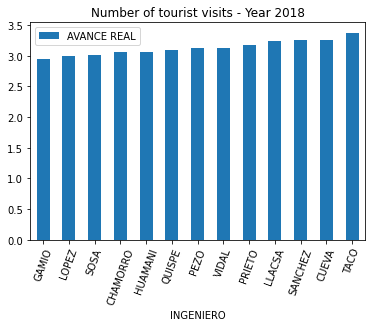

In [90]:
import pandas as pd
import matplotlib.pyplot as plot
a=df_ava.groupby('INGENIERO').mean().sort_values(by=['AVANCE REAL'])
a.plot.bar(y="AVANCE REAL", rot=70, title="Number of tourist visits - Year 2018");
plot.show(block=True);

In [91]:
import plotly.express as px
 
fig = px.bar(a, y = "AVANCE REAL")
fig.show()

In [94]:
# Taking care of jupyter environment 
# show graphs in-line, and turn on/off pretty_printing of lists
%matplotlib inline 
%pprint    

Pretty printing has been turned ON


In [101]:
import pandas as pd
import cufflinks as cf
from IPython.display import display,HTML

cf.set_config_file(sharing='public',theme='white',offline=True) # write cf.getThemes() to find all themes available

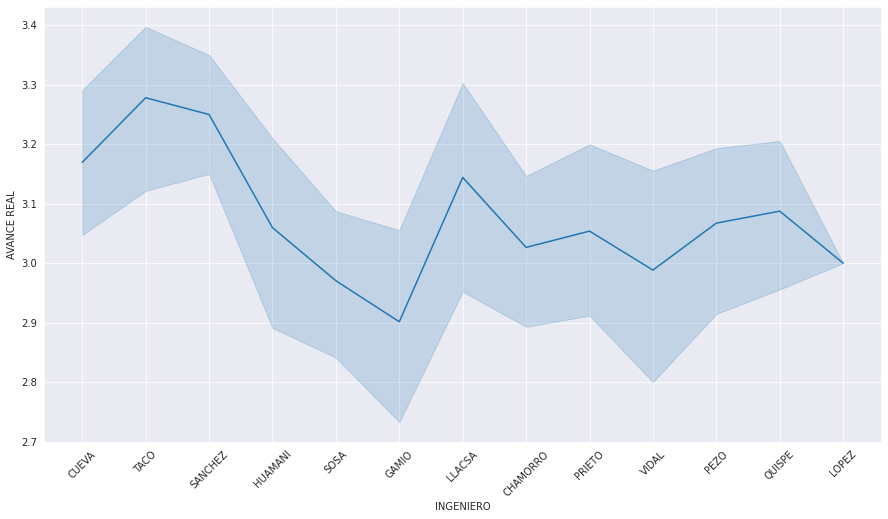

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
sns.set_style("darkgrid")
  
# draw lineplot
plt.figure(figsize = (15,8))
ax=sns.lineplot(x='INGENIERO', y='AVANCE REAL', data=df)
plt.xticks(rotation=45)
plt.show()

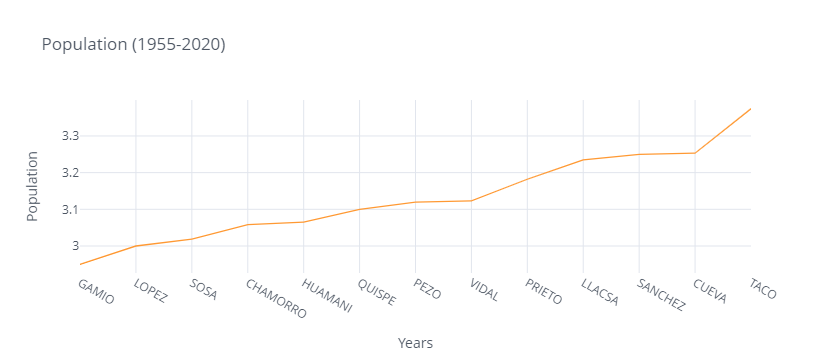

In [106]:
a.iplot(kind='line',xTitle='Years', yTitle='Population',y='AVANCE REAL', title='Population (1955-2020)')

In [108]:
a

,AVANCE REAL
INGENIERO,
GAMIO,2.950000
LOPEZ,3.000000
SOSA,3.019016
CHAMORRO,3.058400
HUAMANI,3.065135
QUISPE,3.100000
PEZO,3.119655
VIDAL,3.123158
PRIETO,3.181935


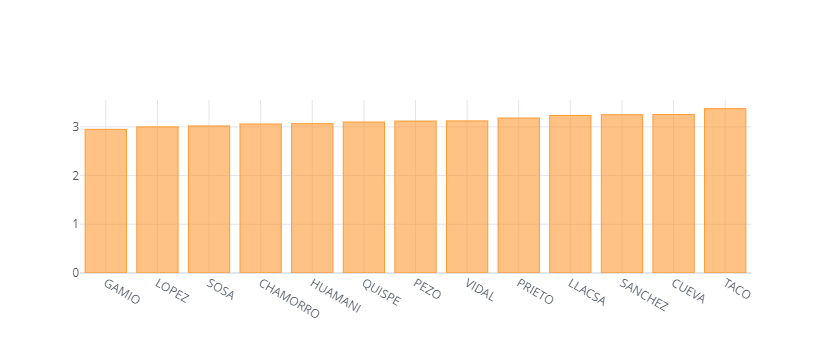

In [110]:
a.iplot(kind='bar')